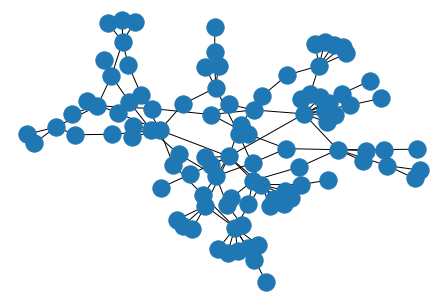

In [85]:
import networkx as nx

G = nx.generators.random_graphs.dual_barabasi_albert_graph(100, 1, 2, 0.9, seed=42)
nx.draw(G)

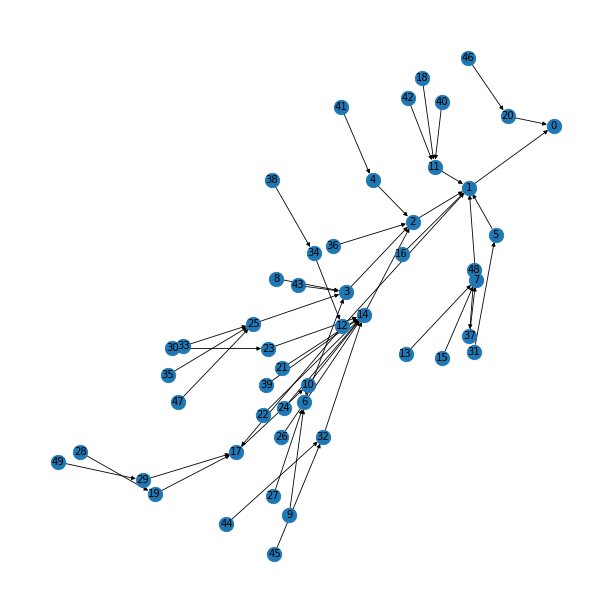

In [1]:
import networkx as nx
from directed_extended_barabasi_albert import directed_extended_barabasi_albert_graph
from matplotlib import pyplot as plt

G = directed_extended_barabasi_albert_graph(n=50, m=1, p=0.1, q=0, seed=0)

fig = plt.figure(1, figsize=(10,10), dpi=60)
nx.draw(G, with_labels=True, font_weight='normal')


In [47]:
# G.in_edges[G.nodes[0]]
n = 14
[t[0] for t in list(G.in_edges) if t[1] == n]


[21, 22, 23, 24, 26, 10, 32, 39]

In [84]:
import numpy as np
import pandas as pd

def sample(high=1):
    return np.random.uniform(low=0, high=high, size=(1,))[0]


def pathway(p=None, thresh=0.05):
    if p is None:
        return pathway(p=[sample()], thresh=thresh)
    if (new_p := sample(high=p[-1])) >= thresh:
        return pathway(p=(p + [new_p]), thresh=thresh)
    return p + [new_p]

pathways = [pathway() for _ in range(1000000)]


In [61]:
import dataclasses
from typing import List


@dataclasses.dataclass
class Config:
    n_states: int
    n_tiers: int
    pathways: List[List[float]]

    def __post_init__(self):
        
        self.cutoffs = np.linspace(start=0, stop=1, num=self.n_tiers+1)[1:]
        all_depths = np.asarray([depth for pathway in self.pathways for depth in pathway])
        self.cumulative_tier_state_distribution = [
            (all_depths < cutoff).sum() / len(all_depths)
            for cutoff in self.cutoffs
        ]
        self.tier_state_distribution = np.diff(self.cumulative_tier_state_distribution, prepend=[0])


cfg = Config(
    n_states=100,
    n_tiers=4,
    pathways=pathways,
)

cfg.cutoffs
print(cfg.cumulative_tier_state_distribution, cfg.tier_state_distribution)



[0.6572790215373511, 0.8283592013901763, 0.9287391268881952, 1.0] [0.65727902 0.17108018 0.10037993 0.07126087]


In [57]:
np.sum(cfg.tier_state_distribution)

1.0

array([0.  , 0.25, 0.5 , 0.75, 1.  ])